# Generating Fuzzy Rules for Traffic Light Timing (Vehicles) Using Numerical Data
please ensure you have created the __init__.py in order to be able to import functions

In [1]:
import utilities as utl
from algorithm_oop import FuzzyInference
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create artificial data set for the proposed problem

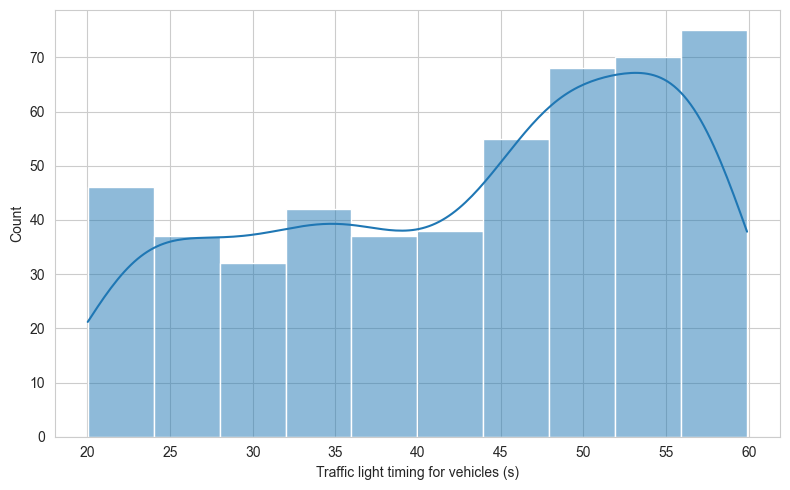

In [2]:
# Generate data based on these rules
# this is how you generate your own
# if you are using our data you can skip running this cell
num_data_points = 500
data = []

for _ in range(num_data_points):
    traffic_density = random.randint(0, 45)
    pedestrian_activity = random.randint(0, 50)
    traffic_light_timing = np.round(utl.generate_traffic_light_timing(traffic_density, pedestrian_activity), 2)
    data.append([traffic_density, pedestrian_activity, traffic_light_timing])
data = np.array(data)
# uncomment below to save data
# pd.DataFrame(data, columns=['Traffic Density (cars / minute)', 'Human Activity (person / minute)', 'Greenlight Time (s)']).to_csv('data.csv')

plt.figure(figsize=(8, 5))
sns.histplot(data[:, 2], kde=True)
plt.xlabel('Traffic light timing for vehicles (s)')

# Show the histograma
plt.tight_layout()
plt.show()

data_normalized = utl.normalize_data(data)
input_data, output_data = data_normalized[:, 0:2], data_normalized[:, 2]

# Use Saved data
Assumption is that your own data has not been normalized yet.

Use the data.csv that we have given

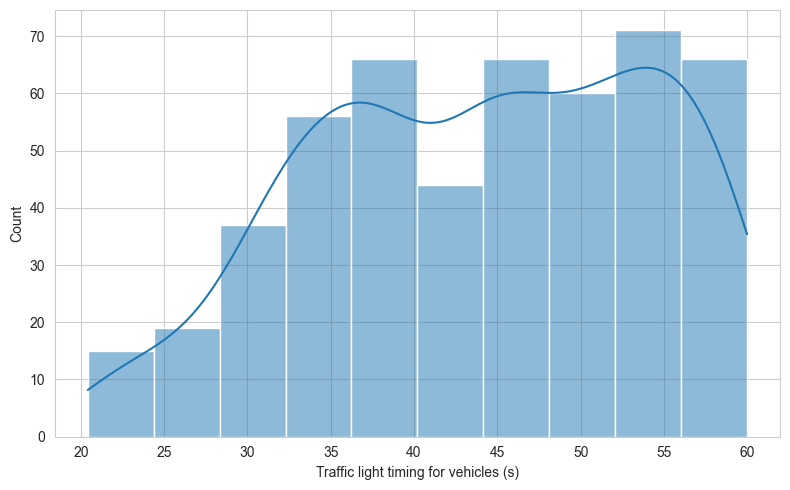

In [3]:
data = pd.read_csv('data.csv', index_col=0)
data = data.to_numpy()
plt.figure(figsize=(8, 5))
sns.histplot(data[:, 2], kde=True)
plt.xlabel('Traffic light timing for vehicles (s)')
# Show the histograma
plt.tight_layout()
plt.show()

data_normalized = utl.normalize_data(data)
input_data, output_data = data_normalized[:, :2], data_normalized[:, 2]

# Fuzzy Inference and Experiments
we run initialize a FuzzyInference object and run a couple of experiments and different parameters, finally we run evaluation function

In [4]:
# initialize object and run an example
fi = FuzzyInference(input_data, output_data)
k = np.array([2, 3])
alpha = 2
B = np.array([3])
pi, main_table, secondary_table, output_inferred, consequent_values = fi.run(k=k, alpha=alpha, B=B)
print('Performance Index:')
print(pi)
print('\nMain rule table:')
print(main_table)
print('\nSecondary rule table:')
print(secondary_table)
print('\nTrue traffic light timing (s):')
print(utl.denormalize_data(output_data[0:5], min(data[:, 2]), max(data[:, 2])))
print('\nInferred traffic light timing (s):')
print(np.round(utl.denormalize_data(output_inferred[0:5], min(data[:, 2]), max(data[:, 2])), 2))

Performance Index:
0.03367131929055337

Main rule table:
[[1 1 1]
 [2 2 1]]

Secondary rule table:
[[2 2 0]
 [1 1 0]]

True traffic light timing (s):
[52.84 36.88 51.05 49.26 31.12]

Inferred traffic light timing (s):
[49.71 39.06 47.39 46.91 41.42]


Evaluate the performance for different combinations of parameters

In [5]:
# run default k=np.array([5, 5]), alpha=2, B=np.array([5])
pi, main_table, secondary_table, output_inferred, consequent_values = fi.run(k=np.array([5, 5]), alpha=2, B=np.array([5]))
print('Performance Index:')
print(pi)
print('\nMain rule table:')
print(main_table)
print('\nSecondary rule table:')
print(secondary_table)
print('\nTrue traffic light timing (s):')
print(utl.denormalize_data(output_data[0:5], min(data[:, 2]), max(data[:, 2])))
print('\nInferred traffic light timing (s):')
print(np.round(utl.denormalize_data(output_inferred[0:5], min(data[:, 2]), max(data[:, 2])), 2))

Performance Index:
0.02253352700965926

Main rule table:
[[2 2 2 1 0]
 [3 2 2 2 1]
 [3 3 3 2 2]
 [3 3 3 2 2]
 [3 3 3 2 2]]

Secondary rule table:
[[1 1 1 2 1]
 [2 3 3 1 0]
 [4 4 4 3 1]
 [4 4 4 3 1]
 [4 4 4 1 1]]

True traffic light timing (s):
[52.84 36.88 51.05 49.26 31.12]

Inferred traffic light timing (s):
[52.54 37.79 52.25 49.86 41.88]


In [6]:
# evaluate performance
k_values = np.array([2, 3, 4, 5])
alpha_values = np.array([0.1, 0.5, 1, 2, 5, 10, 20, 50, 100])

pi, best_pi, best_k, best_alpha = fi.evaluate_performance(k_values=k_values, alpha_values=alpha_values, )
print(pi, best_pi, best_k, best_alpha)

[[0.06143073 0.03969945 0.02946041 0.0239722 ]
 [0.05315981 0.03460753 0.02747226 0.02317513]
 [0.04690155 0.03064518 0.02619548 0.02271796]
 [0.04179875 0.02685546 0.02531768 0.02253353]
 [0.04710459 0.02490695 0.02584288 0.02406617]
 [0.05678409 0.02554846 0.02936095 0.0282613 ]
 [0.05983553 0.02715276 0.03572019 0.03317902]
 [0.06035358 0.02917484 0.03893049 0.03653651]
 [0.06178769 0.0297223  0.03815673 0.03745139]] 0.02253352700965926 5 2.0


In [7]:
# run the best alpha and k
pi, main_table, secondary_table, output_inferred, consequent_values = fi.run(k=np.array([best_k, best_k]), alpha=best_alpha, B=np.array([best_k]))

print('\nMain rule table:')
print(main_table)
print('\nSecondary rule table:')
print(secondary_table)
print('\nTrue traffic light timing (s):')
print(utl.denormalize_data(output_data[0:5], min(data[:, 2]), max(data[:, 2])))
print('\nInferred traffic light timing (s):')
print(np.round(utl.denormalize_data(output_inferred[0:5], min(data[:, 2]), max(data[:, 2])), 2))


Main rule table:
[[2 2 2 1 0]
 [3 2 2 2 1]
 [3 3 3 2 2]
 [3 3 3 2 2]
 [3 3 3 2 2]]

Secondary rule table:
[[1 1 1 2 1]
 [2 3 3 1 0]
 [4 4 4 3 1]
 [4 4 4 3 1]
 [4 4 4 1 1]]

True traffic light timing (s):
[52.84 36.88 51.05 49.26 31.12]

Inferred traffic light timing (s):
[52.54 37.79 52.25 49.86 41.88]


# Convert Numeric Label to Text

In [8]:
# get 5x5 output before converting main table to text

pi, main_table, secondary_table, output_inferred, consequent_values = fi.run(alpha=2)
x1_name = 'Vehicle Density'
label_x1 = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
label_x1 = [x1_name+" " + l for l in label_x1]
x2_name = 'Pedestrian Activity'
label_x2 = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
label_x2 = [x2_name+" " + l for l in label_x2]
label_name = 'Greenlight Time'
label_result = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
label_result = [label_name+" " + l for l in label_result]
main_table_pd = utl.table_to_linguistic_dataframe(main_table,
                                                  label_x1,
                                                  label_x2,
                                                  label_result)
display(main_table_pd)

,Pedestrian Activity Very Low,Pedestrian Activity Low,Pedestrian Activity Medium,Pedestrian Activity High,Pedestrian Activity Very High
Vehicle Density Very Low,Greenlight Time Medium,Greenlight Time Medium,Greenlight Time Medium,Greenlight Time Short,Greenlight Time Very Short
Vehicle Density Low,Greenlight Time Long,Greenlight Time Medium,Greenlight Time Medium,Greenlight Time Medium,Greenlight Time Short
Vehicle Density Medium,Greenlight Time Long,Greenlight Time Long,Greenlight Time Long,Greenlight Time Medium,Greenlight Time Medium
Vehicle Density High,Greenlight Time Long,Greenlight Time Long,Greenlight Time Long,Greenlight Time Medium,Greenlight Time Medium
Vehicle Density Very High,Greenlight Time Long,Greenlight Time Long,Greenlight Time Long,Greenlight Time Medium,Greenlight Time Medium


In [9]:
# get 3x3 output before converting main table to text

pi, main_table, secondary_table, output_inferred, consequent_values = fi.run(
    k=np.array([3,3]),
    alpha=2,
    B=[3]
)

x1_name = 'Vehicle Density'
label_x1 = ['Low', 'Medium', 'High']
label_x1 = [x1_name+" " + l for l in label_x1]
x2_name = 'Pedestrian Activity'
label_x2 = ['Low', 'Medium', 'High']
label_x2 = [x2_name+" " + l for l in label_x2]
label_name = 'Greenlight Time'
label_result = ['Short', 'Medium', 'Long']
label_result = [label_name+" " + l for l in label_result]
main_table_pd = utl.table_to_linguistic_dataframe(main_table,
                                                  label_x1,
                                                  label_x2,
                                                  label_result)
display(main_table_pd)

,Pedestrian Activity Low,Pedestrian Activity Medium,Pedestrian Activity High
Vehicle Density Low,Greenlight Time Medium,Greenlight Time Medium,Greenlight Time Short
Vehicle Density Medium,Greenlight Time Long,Greenlight Time Medium,Greenlight Time Medium
Vehicle Density High,Greenlight Time Long,Greenlight Time Long,Greenlight Time Medium
